## Heart Disease Prediction using ANN
In the dataset, we have 13 columns in which we are given different attributes such as sex, age, cholesterol level, etc. and we are given a target column which tells us whether that person has heart disease or not.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data = pd.read_csv('heart.csv')

In [3]:
# First five rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Last five rows
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# Shape of data
data.shape

(1025, 14)

* Dataset contains 14 features with 1025 observations.

In [6]:
# Columns in data
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
# Statistics of data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
# Check null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

* No missing values present.

### Exploratory Data Analysis

In [10]:
# Analyse fare target
data.target.describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [11]:
data.target.unique()

array([0, 1], dtype=int64)

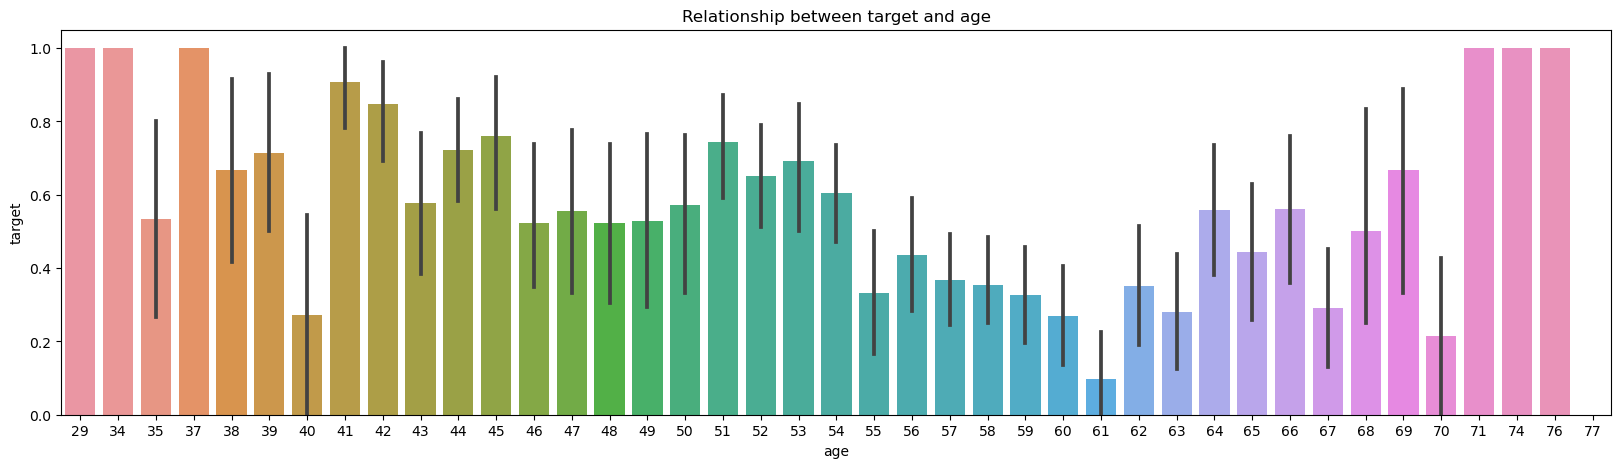

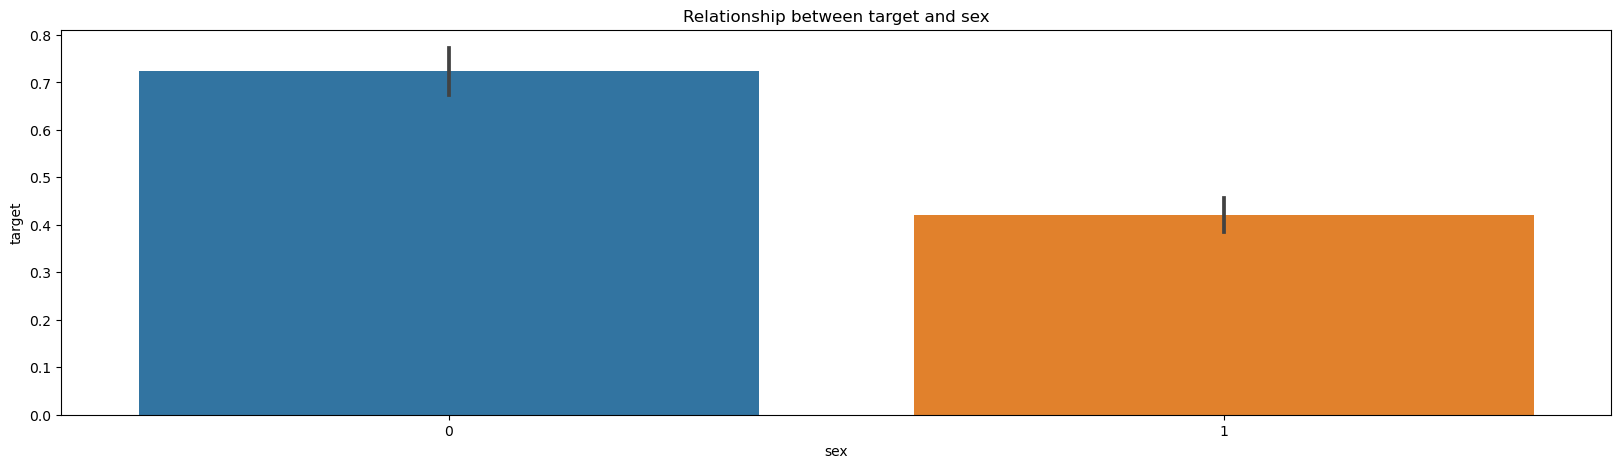

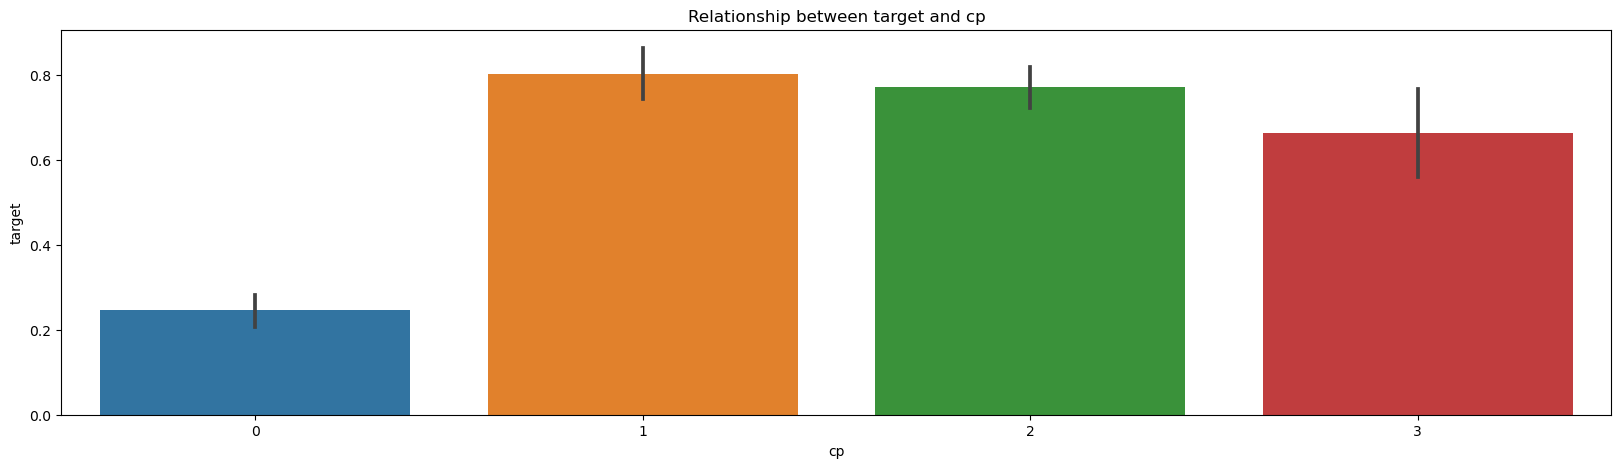

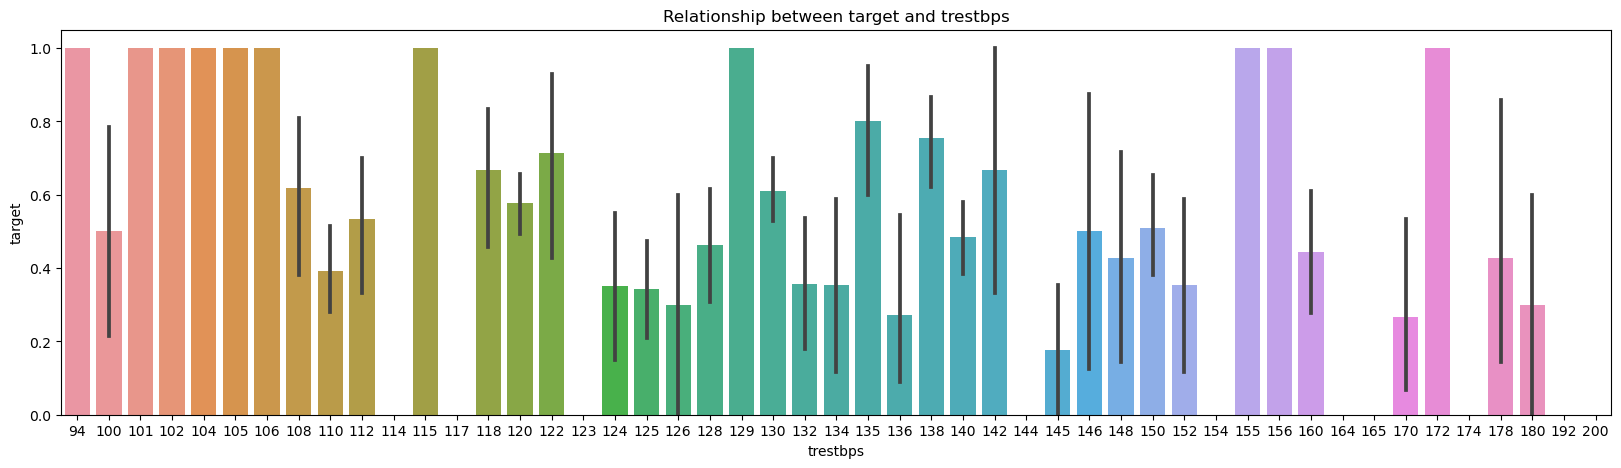

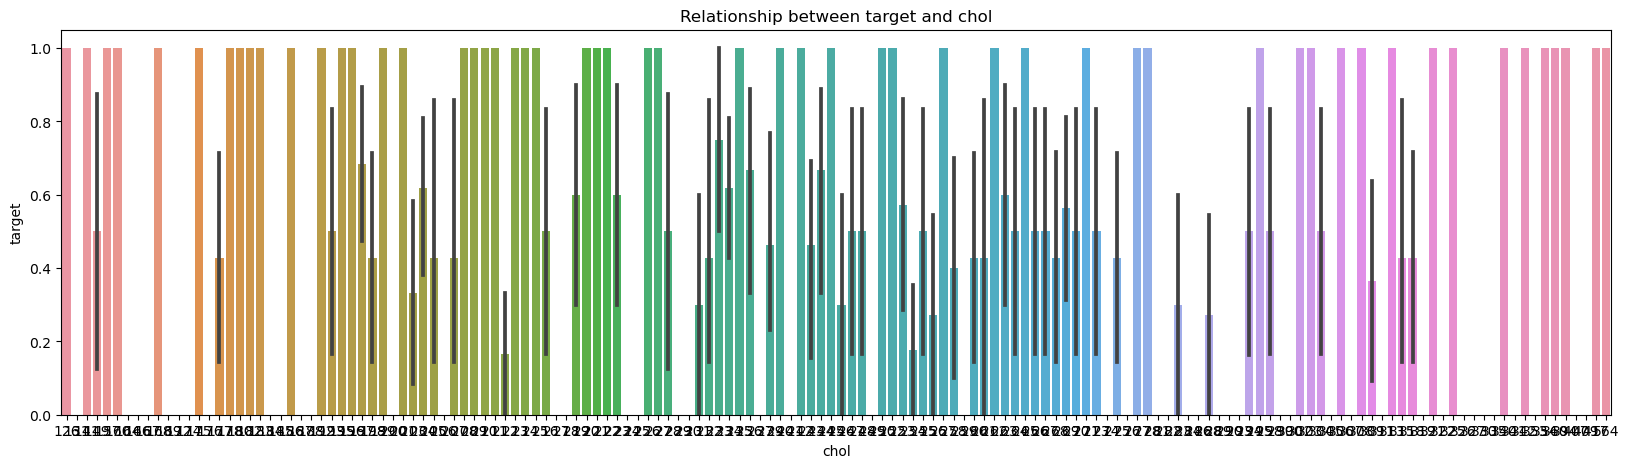

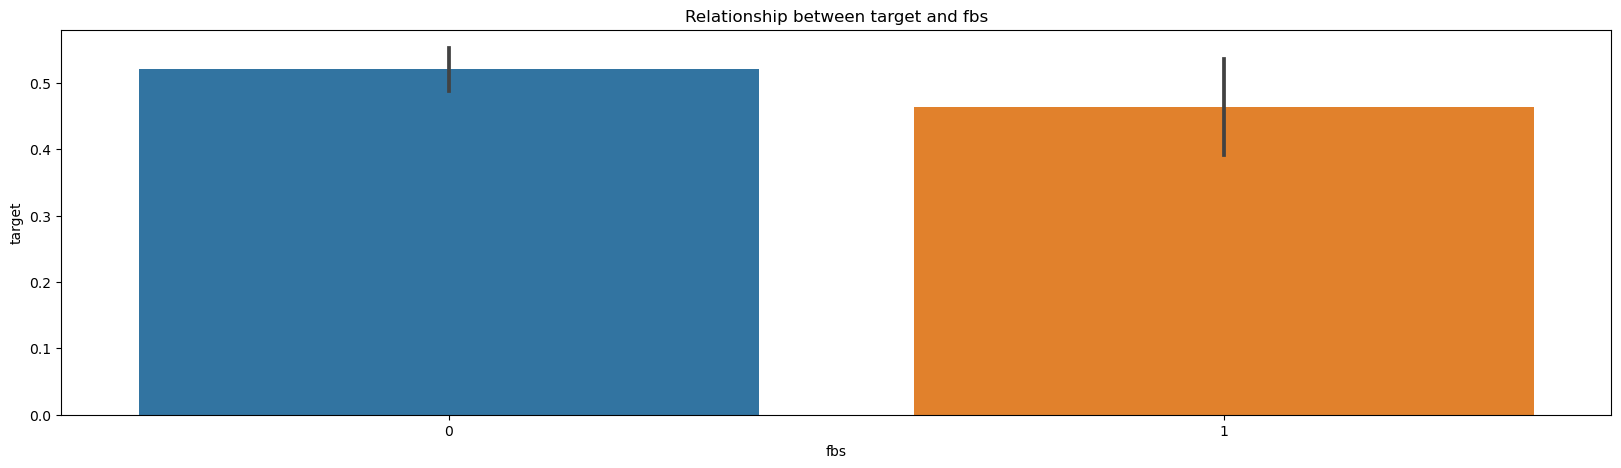

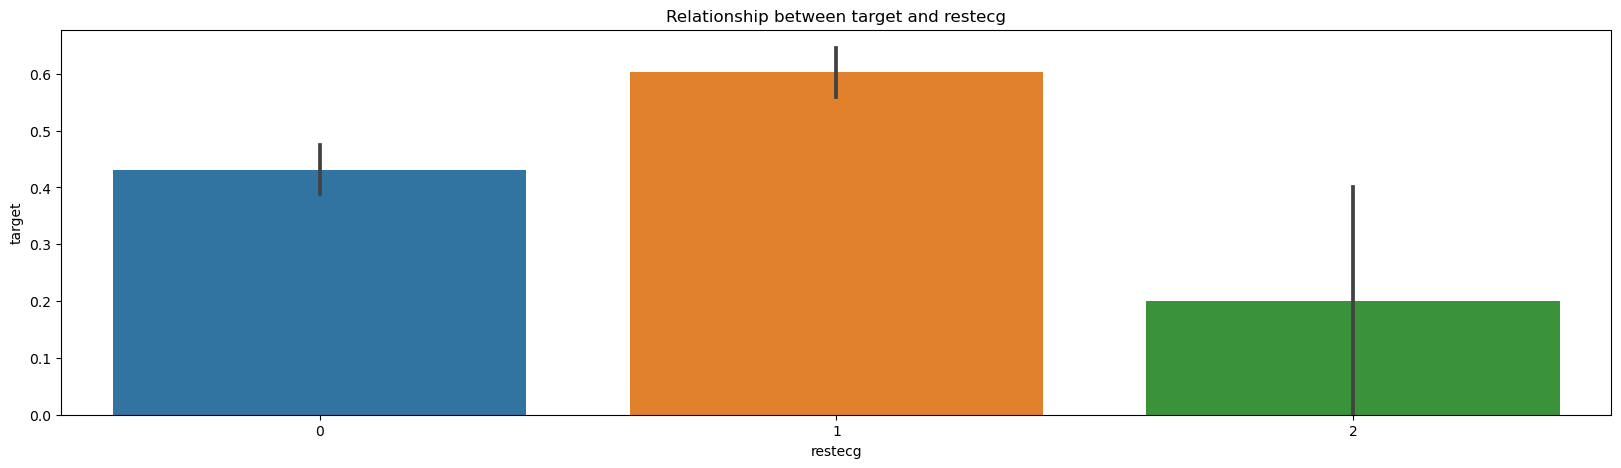

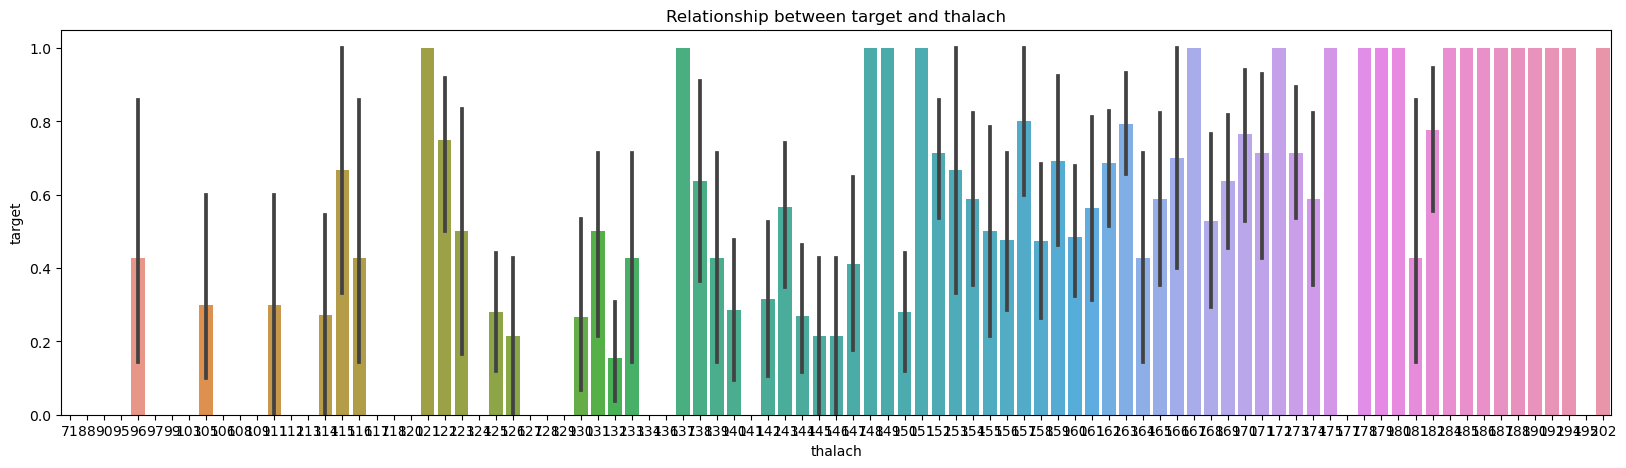

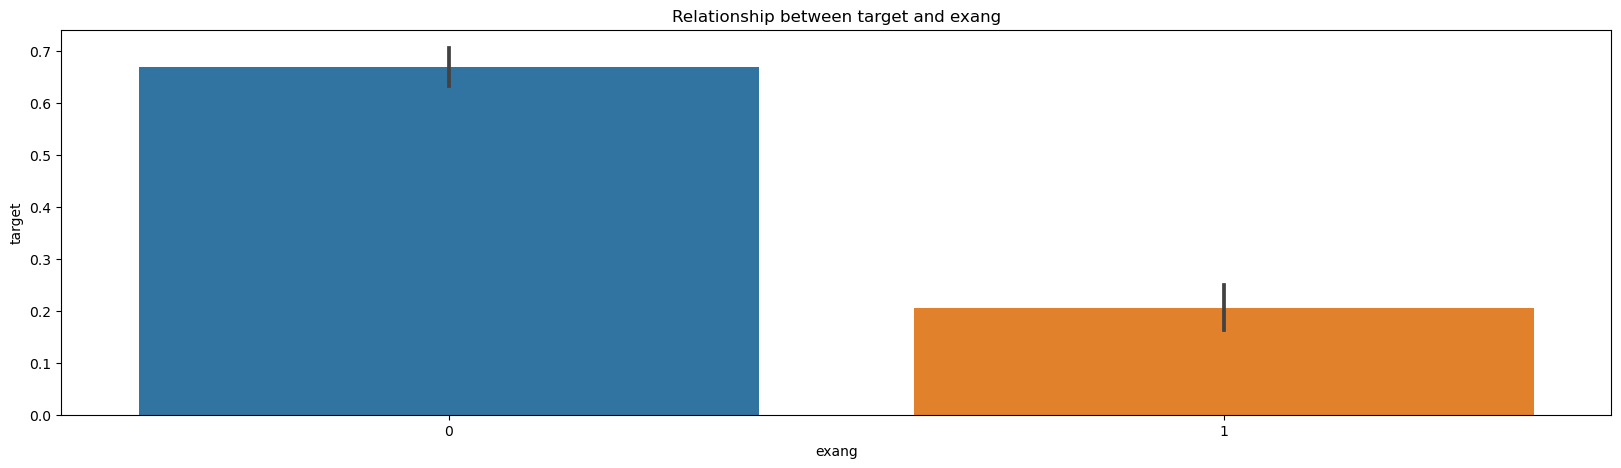

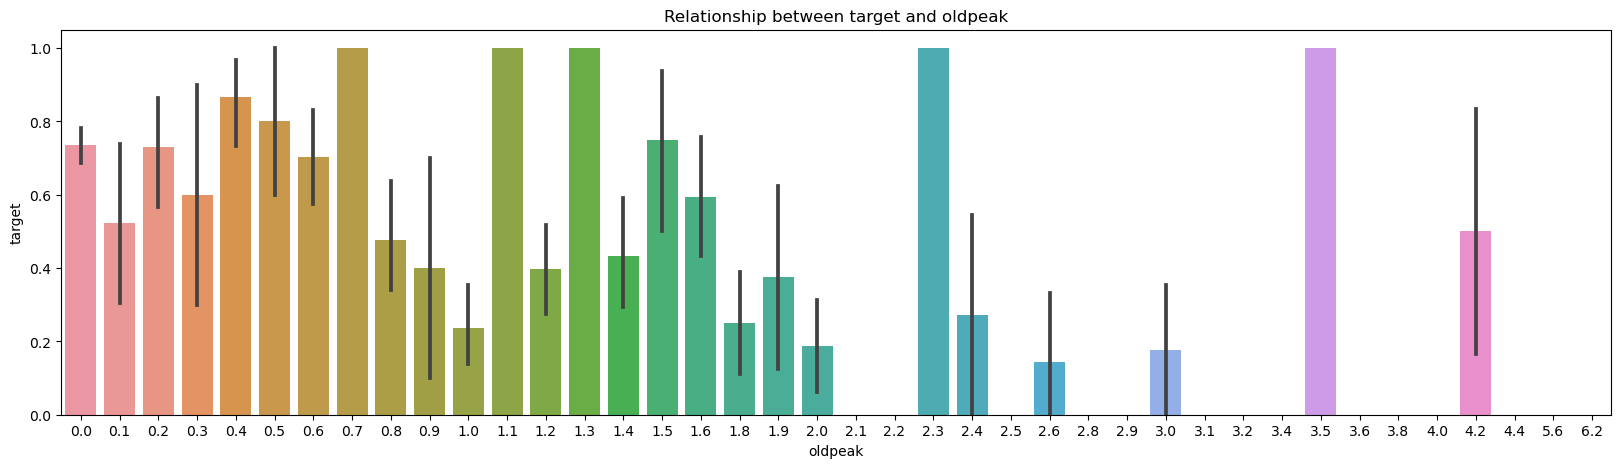

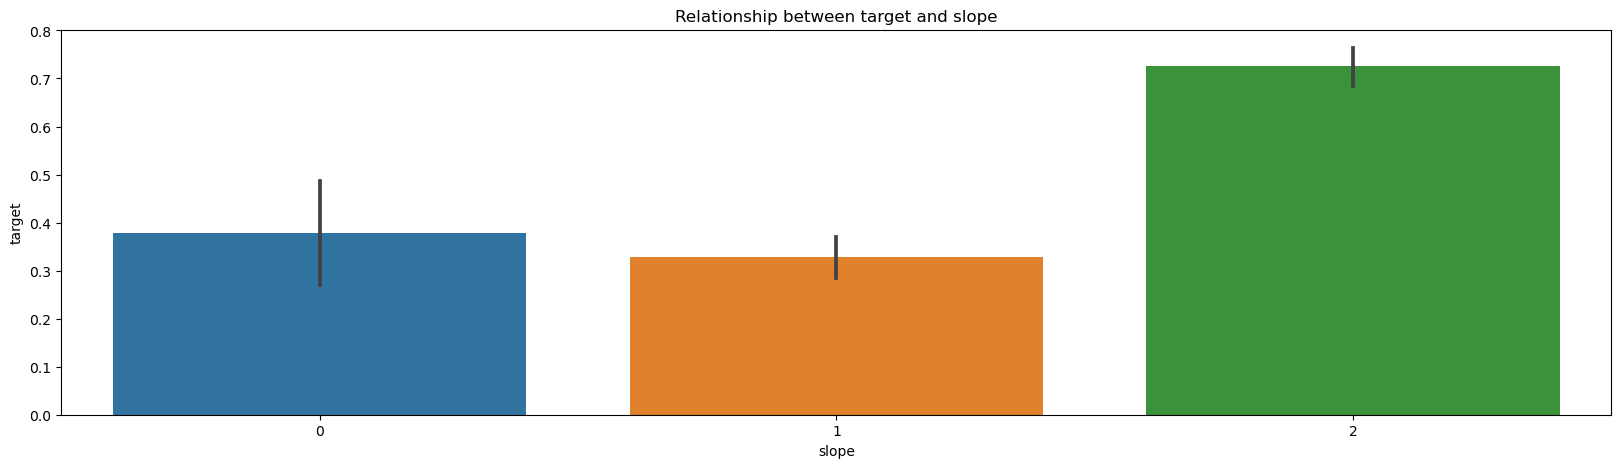

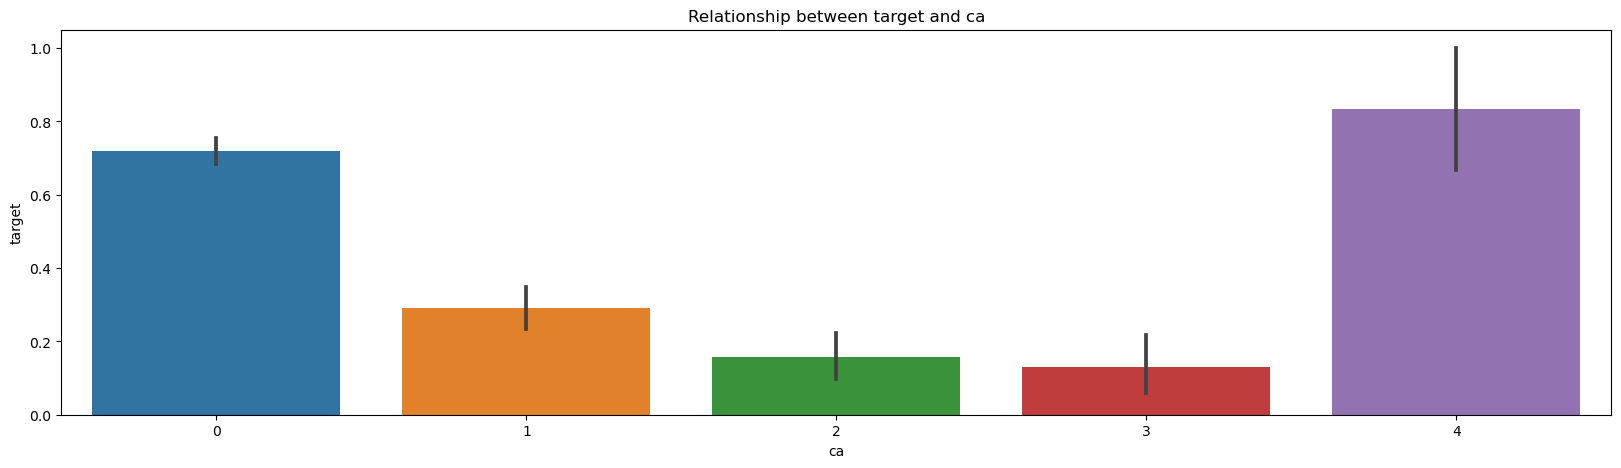

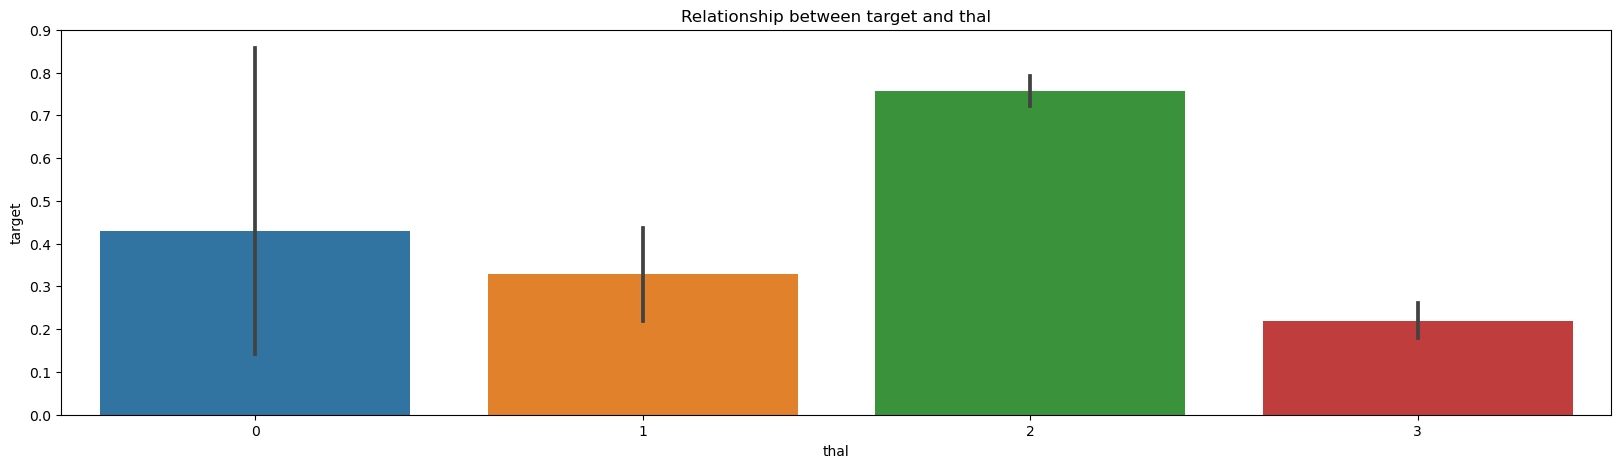

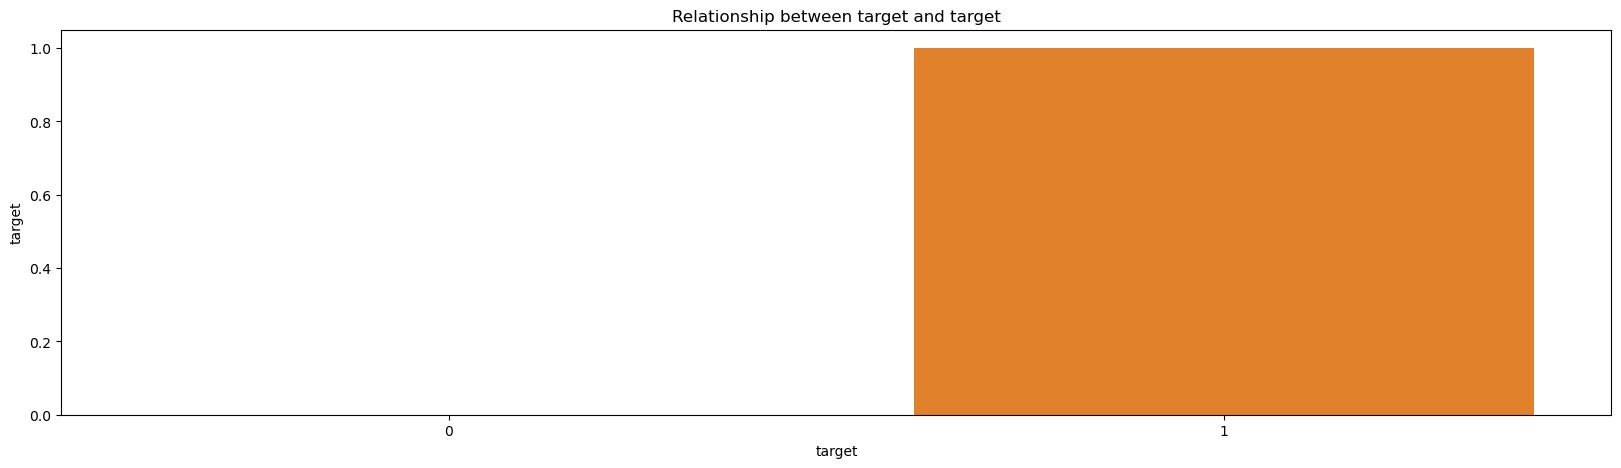

In [12]:
for col in data:
    plt.figure(figsize=(20,5))
    sns.barplot(y=data.target,x=data[col])
    plt.title("Relationship between target and {}".format(col))

### Feature Selection

<AxesSubplot:>

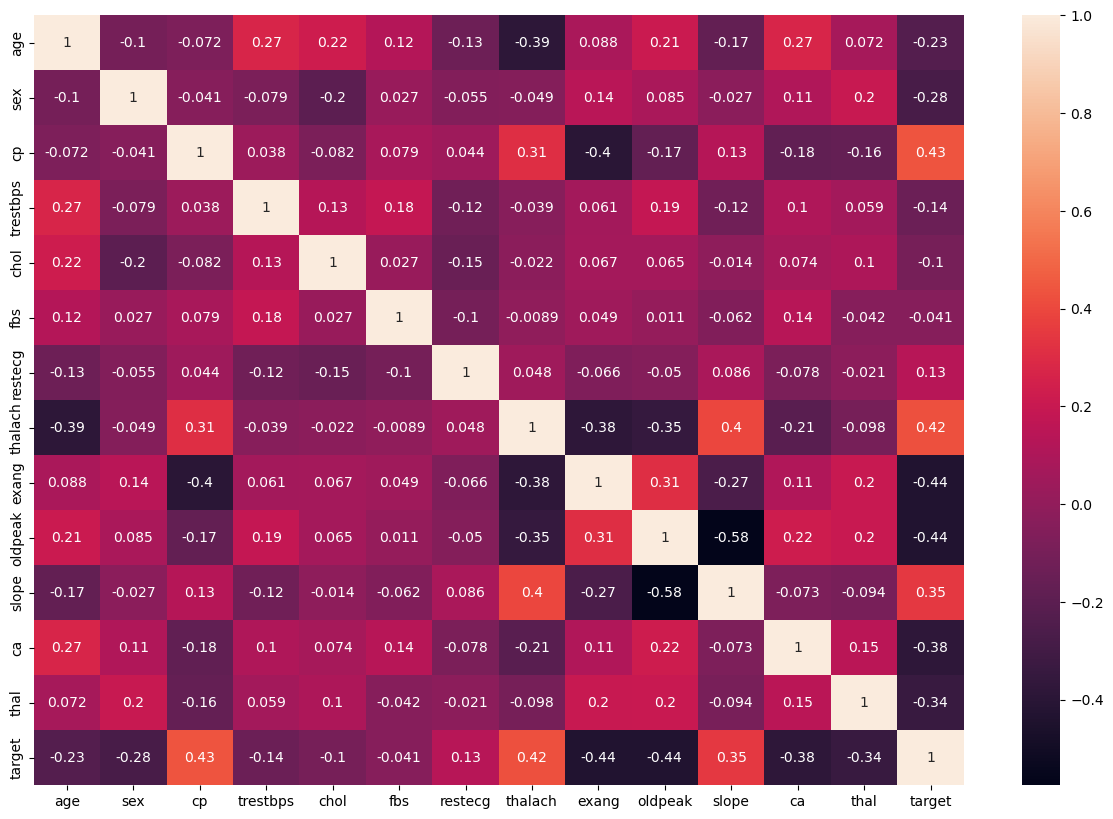

In [13]:
# Heat map
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

### Splitting Data into Dependent and Independent variable

In [14]:
X = data.iloc[:,:13]
y = data["target"]

In [15]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [16]:
# Split data into Train and Test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0 )

In [17]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### ANN Model to predict

In [18]:
import keras
from keras.layers import Dense
from keras.models import Sequential 

In [19]:
model = Sequential()
model.add(Dense(activation='relu',input_dim=13,units=8,kernel_initializer='uniform'))
model.add(Dense(activation='relu',units=14,kernel_initializer='uniform'))
model.add(Dense(activation='sigmoid',units=1,kernel_initializer='uniform'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
# Fitting the Model

model.fit(X_train , y_train , batch_size = 20 ,epochs = 100  )

Epoch 1/100
36/36 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.6165
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.8215
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6328 - accuracy: 0.8382
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.8382
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8410
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8354
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8438
Epoch 8/100
36/36 [==============================] - 0s 3ms/step - loss: 0.3586 - accuracy: 0.8480
Epoch 9/100
36/36 [==============================] - 0s 3ms/step - loss: 0.3528 - accuracy: 0.8480
Epoch 10/100
36/36 [==============================] - 0s 3ms/step - loss: 0.3485 - accuracy: 0.8536
Epoch 11/

36/36 [==============================] - 0s 3ms/step - loss: 0.2015 - accuracy: 0.9344
Epoch 84/100
36/36 [==============================] - 0s 3ms/step - loss: 0.1999 - accuracy: 0.9386
Epoch 85/100
36/36 [==============================] - 0s 3ms/step - loss: 0.1981 - accuracy: 0.9372
Epoch 86/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9386
Epoch 87/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.9386
Epoch 88/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9372
Epoch 89/100
36/36 [==============================] - 0s 3ms/step - loss: 0.1905 - accuracy: 0.9386
Epoch 90/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9414
Epoch 91/100
36/36 [==============================] - 0s 3ms/step - loss: 0.1851 - accuracy: 0.9386
Epoch 92/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1841 - accuracy: 0.9400
Epoch 93/100


In [21]:
# Performing prediction and rescaling

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

10/10 [==============================] - 0s 2ms/step


In [22]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[138,   7],
       [ 10, 153]], dtype=int64)

In [23]:
# Accuracy
Accuracy = accuracy_score(y_test,y_pred)
Accuracy * 100

94.48051948051948